In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
d = pd.read_csv('mnist/test.csv')

In [6]:
d.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data = d

print("the shape of sample data = ", data.shape)

the shape of sample data =  (28000, 784)


In [10]:
from sklearn.preprocessing import StandardScaler
sample_data = StandardScaler().fit_transform(data)
print(sample_data.shape)

(28000, 784)


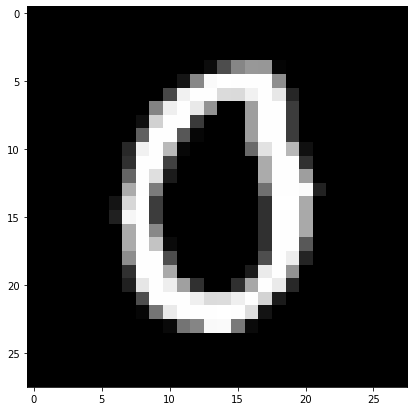

In [11]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 100

grid_data = d.iloc[idx].values.reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

In [12]:
from sklearn import decomposition
pca = decomposition.PCA()

In [13]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 10
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (28000, 10)


In [15]:
dataframe = pd.DataFrame(data=pca_data, columns=("1_principal", "2_principal",
                                                 "3_principal", "4_principal",
                                                 "5_principal", "6_principal",
                                                 "7_principal", "8_principal",
                                                 "9_principal", "10_principal"))
print(dataframe.head())

   1_principal  2_principal  3_principal  4_principal  5_principal  \
0    11.748832    -4.444591     3.044156     5.024515    -0.462621   
1    18.395331    -0.997799    -5.022391     2.130773    11.829075   
2    -5.250478    -0.300043    -0.916774     0.685252     2.420138   
3    -3.200054    -0.589547    -3.624782     6.284797     0.179420   
4    -1.764178    -1.881553     7.922345     0.952113    -2.034245   

   6_principal  7_principal  8_principal  9_principal  10_principal  
0     7.937582     1.141180     1.116585     4.403717     -2.352378  
1    -4.854927    -6.490095     0.366805    -0.289913     -6.084436  
2     1.776707     0.229085    -2.552986    -0.241175      1.924898  
3     2.149579     0.847627     0.515234     1.572248      1.634894  
4     0.120175     0.684347     2.900982     5.608943     -1.371829  


In [17]:
from pathlib import Path  
filepath = Path('mnist/test_10pca.csv') 
dataframe.to_csv(filepath)